# Using Cross validation (10 fold cross validation )

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv("c:/users/HP/Dropbox/Breast Cancer ML Project/breast-cancer-wisconsin-data/data.csv")
cancer_df = df.copy()    # CREATING A COPY OF THE ORIGINAL DATAFRAME
print("Shape of the data : " , cancer_df.shape )
cancer_df.head(5 )

Shape of the data :  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Preprocessing

In [3]:
y = cancer_df.diagnosis.values 

cancer_df.drop(["Unnamed: 32" , "id", "diagnosis"] , axis = 1 , inplace= True ) 
cancer_df.head(3) 
X = cancer_df.values 

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(X )
scaled_x = scaler.transform(X) 
# scaled_X is the new X 

# Cross Validation 

In [6]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 


In [7]:
kfold = KFold (n_splits = 10 , shuffle = True  , random_state= 4 )
# Creating an instance of KFold cross validation 

# Logistic Regression 

In [8]:
log_model = LogisticRegression(solver = "liblinear") 
accuracy = [] 

In [9]:
score = []
for train , test in kfold.split(scaled_x , y ) :
    X_train , X_test = scaled_x[train] , scaled_x[test]
    y_train , y_test = y[train ] , y[test] 
    log_model.fit(X_train , y_train )
    score.append(log_model.score(X_test , y_test ))
    

In [10]:
score = round(sum(score) * 10, 2 ) 
accuracy.append(score )
print("LogisticRegression score : " , score)

LogisticRegression score :  97.36


# Decision Tree 

In [11]:
from sklearn.tree import DecisionTreeClassifier 

In [12]:
depths = [i for i in range(3, 10 )]
for depth in depths :
    tree_accuracy = []
    tree = DecisionTreeClassifier(criterion= "entropy" , max_depth= depth , random_state= 3 ) 
    for train , test in kfold.split(scaled_x ) :
        X_train , X_test = scaled_x[train ] , scaled_x[test ]
        y_train , y_test = y[train ] , y[test ] 
        tree.fit(X_train , y_train  ) 
        tree_accuracy.append(tree.score(X_test , y_test ))
    
    print("Depth : " , depth )
    print("Accuracy :" , round(sum(tree_accuracy)*10 , 2 )  , end = "\n\n")
        
        

Depth :  3
Accuracy : 92.98

Depth :  4
Accuracy : 92.27

Depth :  5
Accuracy : 93.32

Depth :  6
Accuracy : 92.97

Depth :  7
Accuracy : 92.8

Depth :  8
Accuracy : 92.8

Depth :  9
Accuracy : 92.8



In [13]:
# for depth = 5 , accuracy using 10-fold cross validation is 93.32 % 
accuracy.append(93.32)

# KNN 

In [14]:
from sklearn.neighbors import KNeighborsClassifier 


In [15]:
for k in range(2, 15 ) :
    knn  = KNeighborsClassifier(n_neighbors =  k ) 
    k_accuracy = []
    for train , test in kfold.split(scaled_x) :
        X_train , X_test = scaled_x[train] , scaled_x[test]
        y_train , y_test = y[train ] , y[test ]
        knn.fit(X_train , y_train )
        k_accuracy.append(knn.score(X_test , y_test ))
    
    print("k value : "  , k )
    print("Accuracy : " , round(sum(k_accuracy)* 10, 2 )   , end = "\n\n" )
        

k value :  2
Accuracy :  95.6

k value :  3
Accuracy :  96.66

k value :  4
Accuracy :  96.66

k value :  5
Accuracy :  97.01

k value :  6
Accuracy :  96.31

k value :  7
Accuracy :  96.48

k value :  8
Accuracy :  96.13

k value :  9
Accuracy :  96.66

k value :  10
Accuracy :  96.31

k value :  11
Accuracy :  96.31

k value :  12
Accuracy :  96.31

k value :  13
Accuracy :  96.31

k value :  14
Accuracy :  96.13



In [16]:
# for k = 5 , using 10-fold cross validation we are getting an accuracy of 97.01 
accuracy.append(97.01)

# visualization 


In [17]:
prev_accuracy = [96.27, 94.14, 99.46]
test = ["log_reg" , "Dec_tree" , "KNN"]

In [18]:
test_df = pd.DataFrame({"Test" : test , "Using cross Validation" : accuracy , "No cross validation" : prev_accuracy})
test_df 

,Test,Using cross Validation,No cross validation
0,log_reg,97.36,96.27
1,Dec_tree,93.32,94.14
2,KNN,97.01,99.46


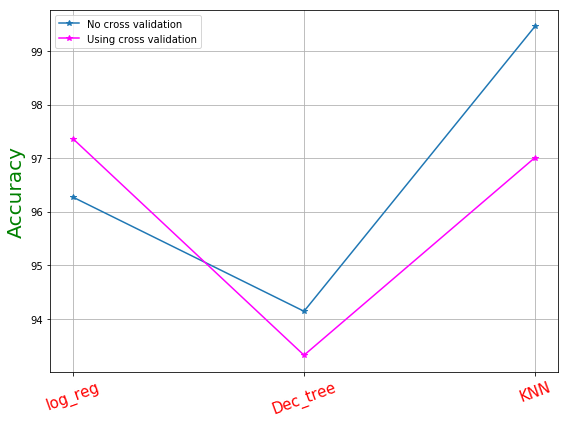

In [19]:
plt.figure(figsize= (8,6 ))
plt.plot(test , prev_accuracy , marker = "*" , label = "No cross validation ")
plt.plot(test , accuracy , marker = "*" , label = "Using cross validation" , color = "magenta")
plt.ylabel("Accuracy" , color = "green" , fontsize = 20 )
plt.xticks(color = "red" , fontsize = 15 , rotation = 20 )
plt.grid(True)
plt.legend()
plt.tight_layout() 
plt.savefig("second_ana1.png")
plt.show()

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

In [21]:
kernels = ["linear" , "poly", "rbf" , "sigmoid"] 
C = [1 , 10 ,100 , 1000 ]
gamma = [1 , 0.1 , 0.01 , 0.001 ]
kernel_accuracy = [] 

In [22]:
for kernel in kernels :
    grid = GridSearchCV(estimator = SVC() , param_grid= {"C" : C , "gamma" : gamma , "kernel" : [kernel]}) 
    fold_accuracy = []
    for train , test in kfold.split(scaled_x) :
        X_train , X_test = scaled_x[train ] , scaled_x[test ] 
        y_train , y_test = y[train] , y[test]
        grid.fit(X_train, y_train )
        fold_accuracy.append(grid.score(X_test , y_test ))
        
    print("kernel name : " , kernel )
    avg_score = round(sum(fold_accuracy)*10, 2) 
    print("Accuracy score :" , avg_score , end = "\n\n")
    kernel_accuracy.append(avg_score)
    
        

D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. Th

kernel name :  linear
Accuracy score : 96.66



D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. Th

kernel name :  poly
Accuracy score : 96.31



D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. Th

kernel name :  rbf
Accuracy score : 97.89



D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. Th

kernel name :  sigmoid
Accuracy score : 96.48



# visualization 

In [23]:
prev_kernel_accuracy = [ 96.28, 95.21, 99.47, 97.87]

In [24]:
kernel_df = pd.DataFrame({"Kernels" : kernels , "Using CV" : kernel_accuracy , "Without CV " : prev_kernel_accuracy}) 
kernel_df

,Kernels,Using CV,Without CV
0,linear,96.66,96.28
1,poly,96.31,95.21
2,rbf,97.89,99.47
3,sigmoid,96.48,97.87


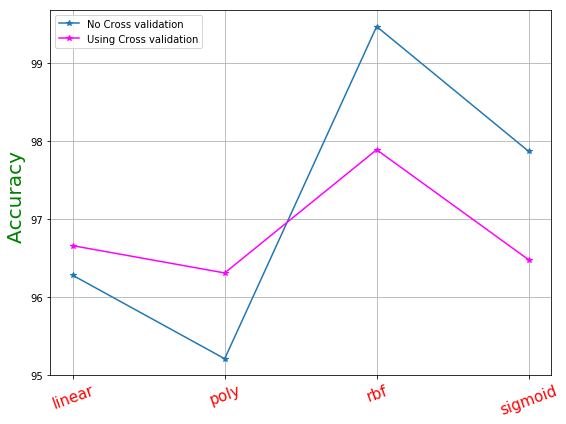

In [25]:
plt.figure(figsize= (8 , 6 ))
plt.plot(kernels , prev_kernel_accuracy , marker = "*" , label = "No Cross validation")
plt.plot(kernels , kernel_accuracy , marker = "*" ,  label = "Using Cross validation" ,  color = "magenta")
plt.xticks(color = "red" ,fontsize = 15 , rotation = 20  )
plt.ylabel("Accuracy " , color = "green" , fontsize = 20)
plt.legend() 
plt.grid(True)
plt.tight_layout()
plt.savefig("second_ana2.png")
plt.show()